# LOAD THE LIBRARIES

In [1]:
import warnings 
warnings.filterwarnings('ignore')

In [2]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = 'all'

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import math

# LOAD THE DATASET

In [4]:
df=pd.read_csv(r'C:\Users\vamsh\Downloads\train.csv')

In [5]:
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [6]:
df.shape

(1460, 81)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [8]:
df.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


# CHECKING DATASET FOR AMOUNT OF NULL VALUES PRESENT

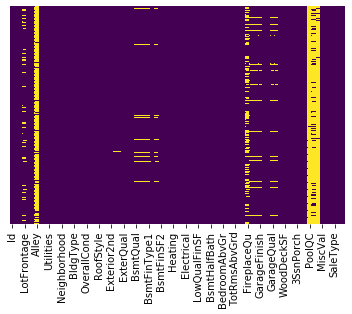

In [9]:
sns.heatmap(df.isnull(),yticklabels=False, cbar=False, cmap='viridis')

In [10]:
df.isnull().sum()

Id                 0
MSSubClass         0
MSZoning           0
LotFrontage      259
LotArea            0
                ... 
MoSold             0
YrSold             0
SaleType           0
SaleCondition      0
SalePrice          0
Length: 81, dtype: int64

### DROPPING IRRELEVANT COLUMNS AND COLUMNS MORE THAN 10% THRESHOLD

In [11]:
round(df.isnull().sum()/len(df.index),2)[round(df.isnull().sum()/
                                                                 len(df.index),2).values>0.10]

LotFrontage    0.18
Alley          0.94
FireplaceQu    0.47
PoolQC         1.00
Fence          0.81
MiscFeature    0.96
dtype: float64

In [12]:
df = df.drop(['LotFrontage','Alley','FireplaceQu','PoolQC','Fence','MiscFeature','MoSold','Street','Utilities'],axis='columns')

In [13]:
df=df.drop('Id',axis='columns')

In [14]:
df.shape

(1460, 71)

### FILLING NULL VALUES FOR NUMERICAL COLUMNS

#### Replacing the null values with the mean of the column 

In [15]:
df.MasVnrArea.fillna(df.MasVnrArea.mean(),inplace=True)
df.GarageYrBlt.fillna(-1,inplace=True)

### FILLING NULL VALUES FOR CATEGORICAL COLUMNS 

#### Replacing the null values with the mode of the column 

In [16]:
for i in list(df.dtypes[df.dtypes=='object'].index):
    df[i].fillna(df[i].mode()[0],inplace=True)

# EXPLORATORY DATA ANALYSIS (EDA) 

### HEATMAP

<Figure size 1296x1296 with 0 Axes>

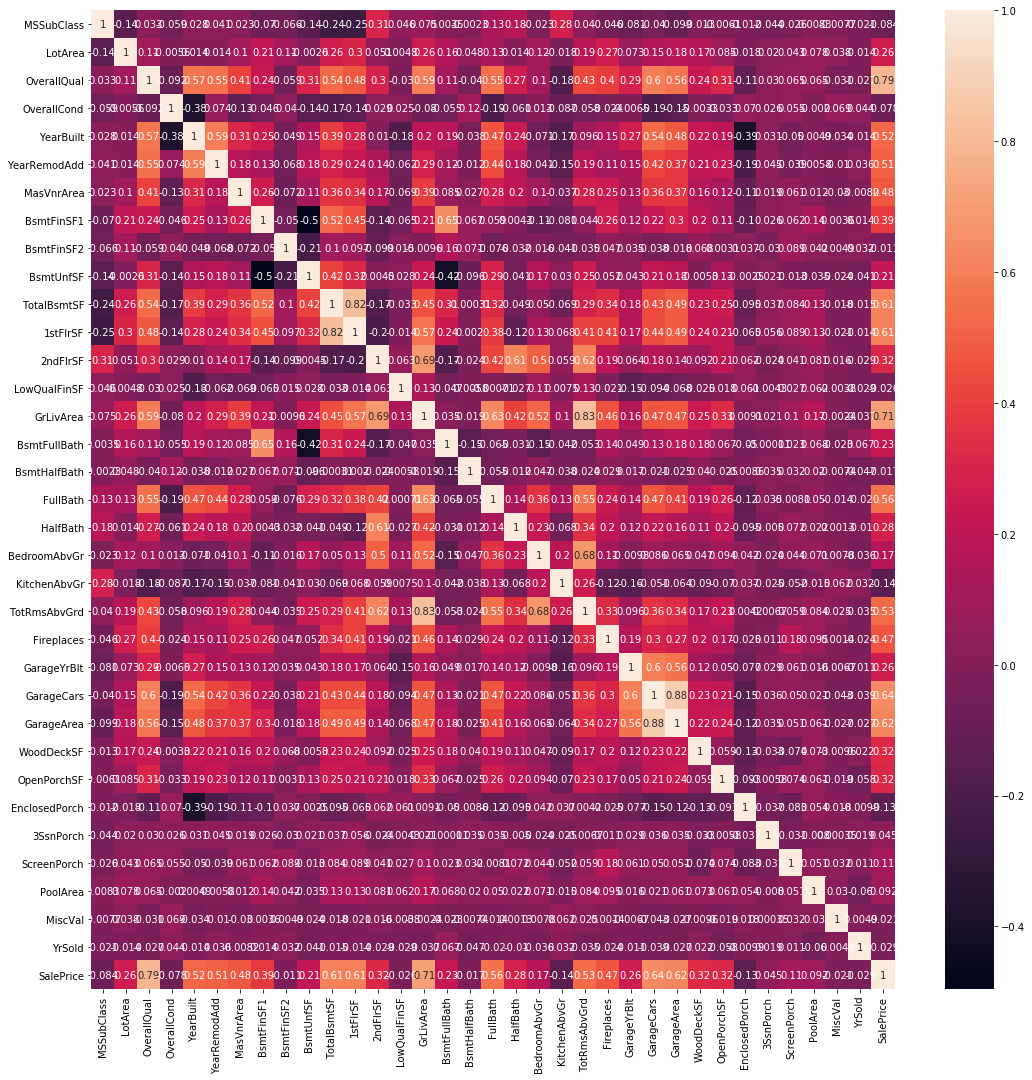

In [17]:
plt.figure(figsize=(18,18))
sns.heatmap(df.corr(),annot=True)
plt.show()

### Scatter Plots for some important numerical columns with SalePrice

<Figure size 1152x576 with 0 Axes>

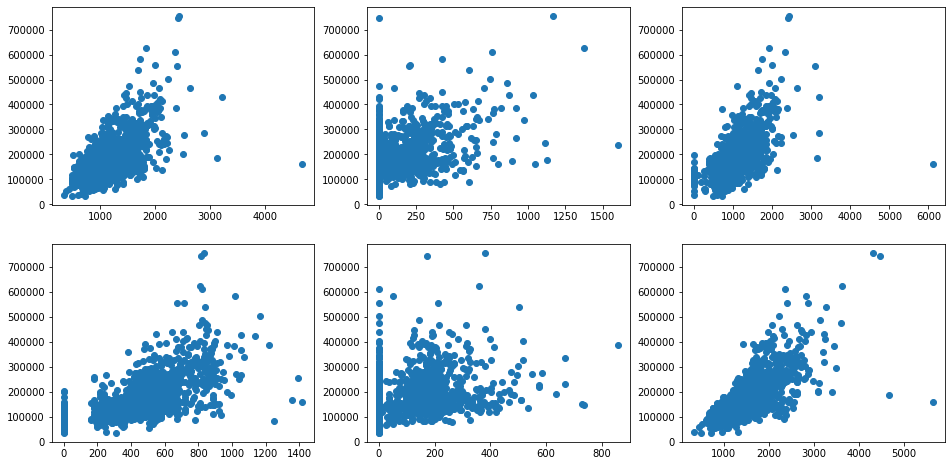

In [18]:
plt.figure(figsize=(16,8))
plt.subplot(2,3,1)
plt.scatter(df['1stFlrSF'],df.SalePrice)
plt.subplot(2,3,2)
plt.scatter(df['MasVnrArea'],df.SalePrice)
plt.subplot(2,3,3)
plt.scatter(df['TotalBsmtSF'],df.SalePrice)
plt.subplot(2,3,4)
plt.scatter(df['GarageArea'],df.SalePrice)
plt.subplot(2,3,5)
plt.scatter(df['WoodDeckSF'],df.SalePrice)
plt.subplot(2,3,6)
plt.scatter(df['GrLivArea'],df.SalePrice)

# DROPPING OUTLIERS 

In [19]:
num_col_list = ['GrLivArea','OpenPorchSF','EnclosedPorch','3SsnPorch','ScreenPorch' ,'LotArea','MasVnrArea','BsmtFinSF1','BsmtFinSF2','TotalBsmtSF','1stFlrSF','PoolArea','MiscVal','SalePrice']
def drop_outliers(x):
    list = []
    for col in num_col_list:
        Q1 = x[col].quantile(.25)
        Q3 = x[col].quantile(.99)
        IQR = Q3-Q1
        x =  x[(x[col] >= (Q1-(1.5*IQR))) & (x[col] <= (Q3+(1.5*IQR)))] 
    return x   

df = drop_outliers(df)

In [20]:
df.shape

(1441, 71)

# LABEL ENCODING 

In [21]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()

In [22]:
for i in list(df.dtypes[df.dtypes=='object'].index):
    df[i]=le.fit_transform(df[i])

# TRAIN TEST SPLIT 

In [23]:
from sklearn.model_selection import train_test_split

df_train,df_test = train_test_split(df,train_size=0.7,test_size=0.3,random_state=42)

In [24]:
df_train.shape,df_test.shape

((1008, 71), (433, 71))

# FEATURE SCALING 

In [25]:
from sklearn.preprocessing import StandardScaler

In [26]:
scale_col = list(df.dtypes[df.dtypes!='int32'].index)

scaler = StandardScaler()
df_train[scale_col] = scaler.fit_transform(df_train[scale_col])
df_test[scale_col] = scaler.transform(df_test[scale_col])

In [27]:
df.head()

,MSSubClass,MSZoning,LotArea,LotShape,LandContour,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,...,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,YrSold,SaleType,SaleCondition,SalePrice
0,60,3,8450,3,3,4,0,5,2,2,...,61,0,0,0,0,0,2008,8,4,208500
1,20,3,9600,3,3,2,0,24,1,2,...,0,0,0,0,0,0,2007,8,4,181500
2,60,3,11250,0,3,4,0,5,2,2,...,42,0,0,0,0,0,2008,8,4,223500
3,70,3,9550,0,3,0,0,6,2,2,...,35,272,0,0,0,0,2006,8,0,140000
4,60,3,14260,0,3,2,0,15,2,2,...,84,0,0,0,0,0,2008,8,4,250000


In [28]:
X_train=df_train.loc[:,df_train.columns!= 'SalePrice']
Y_train = df_train['SalePrice']

In [29]:
X_test=df_test.loc[:,df_test.columns!= 'SalePrice']
Y_test = df_test['SalePrice']

### We have considered SalePrice as the target variable 

# RECURSIVE FEATURE ELIMINATION (RFE) 

In [30]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

In [31]:
linreg  = LinearRegression()
linreg.fit(X_train,Y_train)
rfe = RFE(linreg,55)
rfe.fit(X_train,Y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

RFE(estimator=LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
                               normalize=False),
    n_features_to_select=55, step=1, verbose=0)

In [32]:
rfe_columns = pd.DataFrame(list(zip(X_train.columns,rfe.support_)))
rfe_columns.columns = ['Columns','rfe_support']

In [33]:
rfe_columns

,Columns,rfe_support
0,MSSubClass,True
1,MSZoning,True
2,LotArea,True
3,LotShape,False
4,LandContour,True
...,...,...
65,PoolArea,False
66,MiscVal,True
67,YrSold,True
68,SaleType,False


In [34]:
rfe_main_columns = list(rfe_columns[rfe_columns.rfe_support==True].Columns)

### Considering the RFE selected columns 

In [35]:
X_train = X_train[rfe_main_columns]
X_test = X_test[rfe_main_columns]

In [36]:
X_train.shape,X_test.shape

((1008, 55), (433, 55))

# LASSO REGRESSION MODEL 

In [37]:
from sklearn.linear_model import Lasso
from sklearn.metrics import r2_score

In [38]:
lasso = Lasso(alpha=0.001)
lasso.fit(X_train,Y_train)

Lasso(alpha=0.001, copy_X=True, fit_intercept=True, max_iter=1000,
      normalize=False, positive=False, precompute=False, random_state=None,
      selection='cyclic', tol=0.0001, warm_start=False)

In [39]:
y_pred  = lasso.predict(X_test)

In [40]:
y_train_pred = lasso.predict(X_train)
print(r2_score(Y_train,y_train_pred))

0.8836241432102303


In [41]:
r2_score(Y_test,y_pred)

0.870409366863203

## Using GridSearchCV to improve our Lasso regression model with optimal value of alpha

In [42]:
from sklearn.model_selection import GridSearchCV,KFold

In [43]:
model = Lasso()
hyper_param = {'alpha':[0.001, 0.01, 0.1,1.0, 5.0, 10.0,20.0]}
folds = KFold(n_splits=10,shuffle=True,random_state=42)

model_cv = GridSearchCV(estimator = model,
                        param_grid=hyper_param,
                        scoring='r2',
                        cv=folds,
                        verbose=1,
                        return_train_score=True
                       )

model_cv.fit(X_train,Y_train)

Fitting 10 folds for each of 7 candidates, totalling 70 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  70 out of  70 | elapsed:    0.9s finished


GridSearchCV(cv=KFold(n_splits=10, random_state=42, shuffle=True),
             error_score=nan,
             estimator=Lasso(alpha=1.0, copy_X=True, fit_intercept=True,
                             max_iter=1000, normalize=False, positive=False,
                             precompute=False, random_state=None,
                             selection='cyclic', tol=0.0001, warm_start=False),
             iid='deprecated', n_jobs=None,
             param_grid={'alpha': [0.001, 0.01, 0.1, 1.0, 5.0, 10.0, 20.0]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
             scoring='r2', verbose=1)

### The optimal value of alpha is: 

In [44]:
model_cv.best_params_

{'alpha': 0.01}

In [45]:
lasso = Lasso(alpha=0.01)
lasso.fit(X_train,Y_train)

Lasso(alpha=0.01, copy_X=True, fit_intercept=True, max_iter=1000,
      normalize=False, positive=False, precompute=False, random_state=None,
      selection='cyclic', tol=0.0001, warm_start=False)

In [46]:
y_train_pred = lasso.predict(X_train)
y_test_pred = lasso.predict(X_test)

In [47]:
print(r2_score(Y_train,y_train_pred))

0.8752887263905512


In [48]:
print(r2_score(Y_test,y_test_pred))

0.8729043367495957


In [49]:
model_param = list(lasso.coef_)
model_param.insert(0,lasso.intercept_)
cols = df_train.columns
cols.insert(0,'const')
lasso_coef = pd.DataFrame(list(zip(cols,model_param)))
lasso_coef.columns = ['Features','Coefficients']
lasso_coef.sort_values(by='Coefficients',ascending=False).head(10)

Index(['const', 'MSSubClass', 'MSZoning', 'LotArea', 'LotShape', 'LandContour',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt',
       'YearRemodAdd', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd',
       'MasVnrType', 'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation',
       'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'GarageType', 'GarageYrBlt',
       'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual', 'GarageCond',
       'PavedDrive', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch',
    

,Features,Coefficients
0,MSSubClass,0.406331
32,BsmtUnfSF,0.294909
8,Condition1,0.206216
22,ExterQual,0.108824
45,HalfBath,0.080623
15,YearRemodAdd,0.072565
3,LotShape,0.070688
9,Condition2,0.060644
10,BldgType,0.057855
26,BsmtCond,0.056407


## FOR DOUBLE THE VALUE OF ALPHA 

In [50]:
lasso = Lasso(alpha=0.02)
lasso.fit(X_train,Y_train)

Lasso(alpha=0.02, copy_X=True, fit_intercept=True, max_iter=1000,
      normalize=False, positive=False, precompute=False, random_state=None,
      selection='cyclic', tol=0.0001, warm_start=False)

In [51]:
y_train_pred = lasso.predict(X_train)
y_test_pred = lasso.predict(X_test)

In [52]:
print(r2_score(Y_train,y_train_pred))

0.8687932859585151


In [53]:
print(r2_score(Y_test,y_test_pred))

0.8683516446021355


### PREDICTOR VARIABLES: 

In [54]:
model_param = list(lasso.coef_)
model_param.insert(0,lasso.intercept_)
cols = df_train.columns
cols.insert(0,'const')
lasso_coef = pd.DataFrame(list(zip(cols,model_param)))
lasso_coef.columns = ['Features','Coefficients']
lasso_coef.sort_values(by='Coefficients',ascending=False).head(10)

Index(['const', 'MSSubClass', 'MSZoning', 'LotArea', 'LotShape', 'LandContour',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt',
       'YearRemodAdd', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd',
       'MasVnrType', 'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation',
       'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'GarageType', 'GarageYrBlt',
       'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual', 'GarageCond',
       'PavedDrive', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch',
    

,Features,Coefficients
0,MSSubClass,0.520254
32,BsmtUnfSF,0.300602
8,Condition1,0.222476
22,ExterQual,0.107185
45,HalfBath,0.085177
3,LotShape,0.069189
15,YearRemodAdd,0.064532
26,BsmtCond,0.058645
10,BldgType,0.053656
9,Condition2,0.043732


# RIDGE REGRESSION MODEL 

In [55]:
from sklearn.linear_model import Ridge

In [56]:
ridge = Ridge(alpha=0.001)
ridge.fit(X_train,Y_train)

Ridge(alpha=0.001, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=False, random_state=None, solver='auto', tol=0.001)

In [57]:
y_train_pred = ridge.predict(X_train)
print(r2_score(Y_train,y_train_pred))

0.883786083248355


In [58]:
y_test_pred = ridge.predict(X_test)
print(r2_score(Y_test,y_test_pred))

0.8683764796543529


## Using GridSearchCV to improve our Ridge regression model with optimal value of alpha

In [59]:
model = Ridge()
hyper_param = {'alpha':[0.001,0.01,0.1,0.2,0.5,0.9,1.0, 5.0, 10.0,20.0]}
folds  = KFold(n_splits=10,shuffle=True,random_state=42)

model_cv = GridSearchCV(estimator=model,
                        param_grid=hyper_param,
                        scoring='r2',
                        cv=folds,
                        verbose=1,
                        return_train_score=True)

model_cv.fit(X_train,Y_train)

Fitting 10 folds for each of 10 candidates, totalling 100 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    1.1s finished


GridSearchCV(cv=KFold(n_splits=10, random_state=42, shuffle=True),
             error_score=nan,
             estimator=Ridge(alpha=1.0, copy_X=True, fit_intercept=True,
                             max_iter=None, normalize=False, random_state=None,
                             solver='auto', tol=0.001),
             iid='deprecated', n_jobs=None,
             param_grid={'alpha': [0.001, 0.01, 0.1, 0.2, 0.5, 0.9, 1.0, 5.0,
                                   10.0, 20.0]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
             scoring='r2', verbose=1)

### The optimal value of alpha is: 

In [60]:
model_cv.best_params_

{'alpha': 20.0}

In [61]:
ridge = Ridge(alpha=20.0)
ridge.fit(X_train,Y_train)

Ridge(alpha=20.0, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=False, random_state=None, solver='auto', tol=0.001)

In [62]:
y_train_pred = lasso.predict(X_train)
y_test_pred = lasso.predict(X_test)

In [63]:
print(r2_score(Y_train,y_train_pred))

0.8687932859585151


In [64]:
print(r2_score(Y_test,y_test_pred))

0.8683516446021355


In [65]:
model_parameter = list(ridge.coef_)
model_parameter.insert(0,ridge.intercept_)
cols = df_train.columns
cols.insert(0,'constant')
ridge_coef = pd.DataFrame(list(zip(cols,model_parameter)))
ridge_coef.columns = ['Features','Coefficients']
ridge_coef.sort_values(by='Coefficients',ascending=False).head(10)

Index(['constant', 'MSSubClass', 'MSZoning', 'LotArea', 'LotShape',
       'LandContour', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1',
       'Condition2', 'BldgType', 'HouseStyle', 'OverallQual', 'OverallCond',
       'YearBuilt', 'YearRemodAdd', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'MasVnrArea', 'ExterQual', 'ExterCond',
       'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1',
       'BsmtFinSF1', 'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF',
       'Heating', 'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF',
       '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath',
       'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'GarageType', 'GarageYrBlt',
       'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual', 'GarageCond',
       'PavedDrive', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch',
 

,Features,Coefficients
0,MSSubClass,0.515607
8,Condition1,0.178009
32,BsmtUnfSF,0.154505
30,BsmtFinType2,0.117838
26,BsmtCond,0.092865
22,ExterQual,0.092494
15,YearRemodAdd,0.087065
9,Condition2,0.082408
45,HalfBath,0.081191
3,LotShape,0.075872


## FOR DOUBLE THE VALUE OF ALPHA 

In [66]:
ridge = Ridge(alpha=40.0)
ridge.fit(X_train,Y_train)

Ridge(alpha=40.0, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=False, random_state=None, solver='auto', tol=0.001)

In [67]:
y_train_pred = lasso.predict(X_train)
y_test_pred = lasso.predict(X_test)

In [68]:
print(r2_score(Y_train,y_train_pred))

0.8687932859585151


In [69]:
print(r2_score(Y_test,y_test_pred))

0.8683516446021355


### PREDICTOR VARIABLES: 

In [70]:
model_parameter = list(ridge.coef_)
model_parameter.insert(0,ridge.intercept_)
cols = df_train.columns
cols.insert(0,'constant')
ridge_coef = pd.DataFrame(list(zip(cols,model_parameter)))
ridge_coef.columns = ['Features','Coefficients']
ridge_coef.sort_values(by='Coefficients',ascending=False).head(10)

Index(['constant', 'MSSubClass', 'MSZoning', 'LotArea', 'LotShape',
       'LandContour', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1',
       'Condition2', 'BldgType', 'HouseStyle', 'OverallQual', 'OverallCond',
       'YearBuilt', 'YearRemodAdd', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'MasVnrArea', 'ExterQual', 'ExterCond',
       'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1',
       'BsmtFinSF1', 'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF',
       'Heating', 'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF',
       '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath',
       'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'GarageType', 'GarageYrBlt',
       'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual', 'GarageCond',
       'PavedDrive', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch',
 

,Features,Coefficients
0,MSSubClass,0.441921
8,Condition1,0.175248
32,BsmtUnfSF,0.150144
30,BsmtFinType2,0.113585
22,ExterQual,0.091515
26,BsmtCond,0.090964
15,YearRemodAdd,0.086457
9,Condition2,0.079234
45,HalfBath,0.078208
3,LotShape,0.073926


# We are considering Lasso Regression model as our final model as it helps in penalizing and feature elimination  

In [71]:
lasso = Lasso(alpha=0.01)
lasso.fit(X_train,Y_train)

Lasso(alpha=0.01, copy_X=True, fit_intercept=True, max_iter=1000,
      normalize=False, positive=False, precompute=False, random_state=None,
      selection='cyclic', tol=0.0001, warm_start=False)

In [72]:
y_train_pred = lasso.predict(X_train)
y_test_pred = lasso.predict(X_test)

In [73]:
print(r2_score(Y_train,y_train_pred))

0.8752887263905512


In [74]:
print(r2_score(Y_test,y_test_pred))

0.8729043367495957


In [75]:
model_param = list(lasso.coef_)
model_param.insert(0,lasso.intercept_)
cols = df_train.columns
cols.insert(0,'const')
lasso_coef = pd.DataFrame(list(zip(cols,model_param)))
lasso_coef.columns = ['Features','Coefficients']
lasso_coef.sort_values(by='Coefficients',ascending=False).head(10)

Index(['const', 'MSSubClass', 'MSZoning', 'LotArea', 'LotShape', 'LandContour',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt',
       'YearRemodAdd', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd',
       'MasVnrType', 'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation',
       'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'GarageType', 'GarageYrBlt',
       'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual', 'GarageCond',
       'PavedDrive', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch',
    

,Features,Coefficients
0,MSSubClass,0.406331
32,BsmtUnfSF,0.294909
8,Condition1,0.206216
22,ExterQual,0.108824
45,HalfBath,0.080623
15,YearRemodAdd,0.072565
3,LotShape,0.070688
9,Condition2,0.060644
10,BldgType,0.057855
26,BsmtCond,0.056407


## From the Models and Optimal value of alpha 

## We find that,some of the significant variables in predicting the price of a house (on comparison) are: 

**1)<i>MSSubClass</i>**<br>
**2)<i>BsmtUnfSF</i>**<br>
**3)<i>Condition1</i>**<br>
**4)<i>ExterQual</i>**<br>
**5)<i>Condition2</i>**<br>
**6)<i>HalfBath</i>**<br>
**7)<i>LotShape</i>**<br>